In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

### Predecir cuántas veces será compartido un artículo de Machine Learning.
Regresión lineal simple en Python (con 1 variable)
TIPS o sugerencias:
- [ ] Importar el data set
- [ ] Explorar los datos
- [ ] Elegir la variable a analizar
- [ ] Utilizar la libreria SciKitLearn
- [ ] Se sugiere tomar como inputs la columna  Word Count y como "etiquetas" la columna #Shares
- [ ] Graficar la exploracion de datos
- [ ] Calcular la Prediccion

In [49]:
# mint
ruta = '/home/jorge/Programacion/Ciencia Datos/IFTS11/Modelado IA/Entrega/ModelaIA'
articulos = pd.read_csv(ruta + '/articulos_ml.csv')

In [50]:
articulos

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


In [51]:
articulos.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [52]:
articulos.tail()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660
160,[Log] 87: Google's Cloud Is Eating Apple's Lunch,[Log] 87: http://feedproxy.google.com/~r/Techc...,953,6,13.0,2,88,5956


In [53]:
articulos.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [54]:
articulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           161 non-null    object 
 1   url             122 non-null    object 
 2   Word count      161 non-null    int64  
 3   # of Links      161 non-null    int64  
 4   # of comments   129 non-null    float64
 5   # Images video  161 non-null    int64  
 6   Elapsed days    161 non-null    int64  
 7   # Shares        161 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 10.2+ KB


In [55]:
articulos.shape

(161, 8)

In [56]:
articulos.columns

Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')

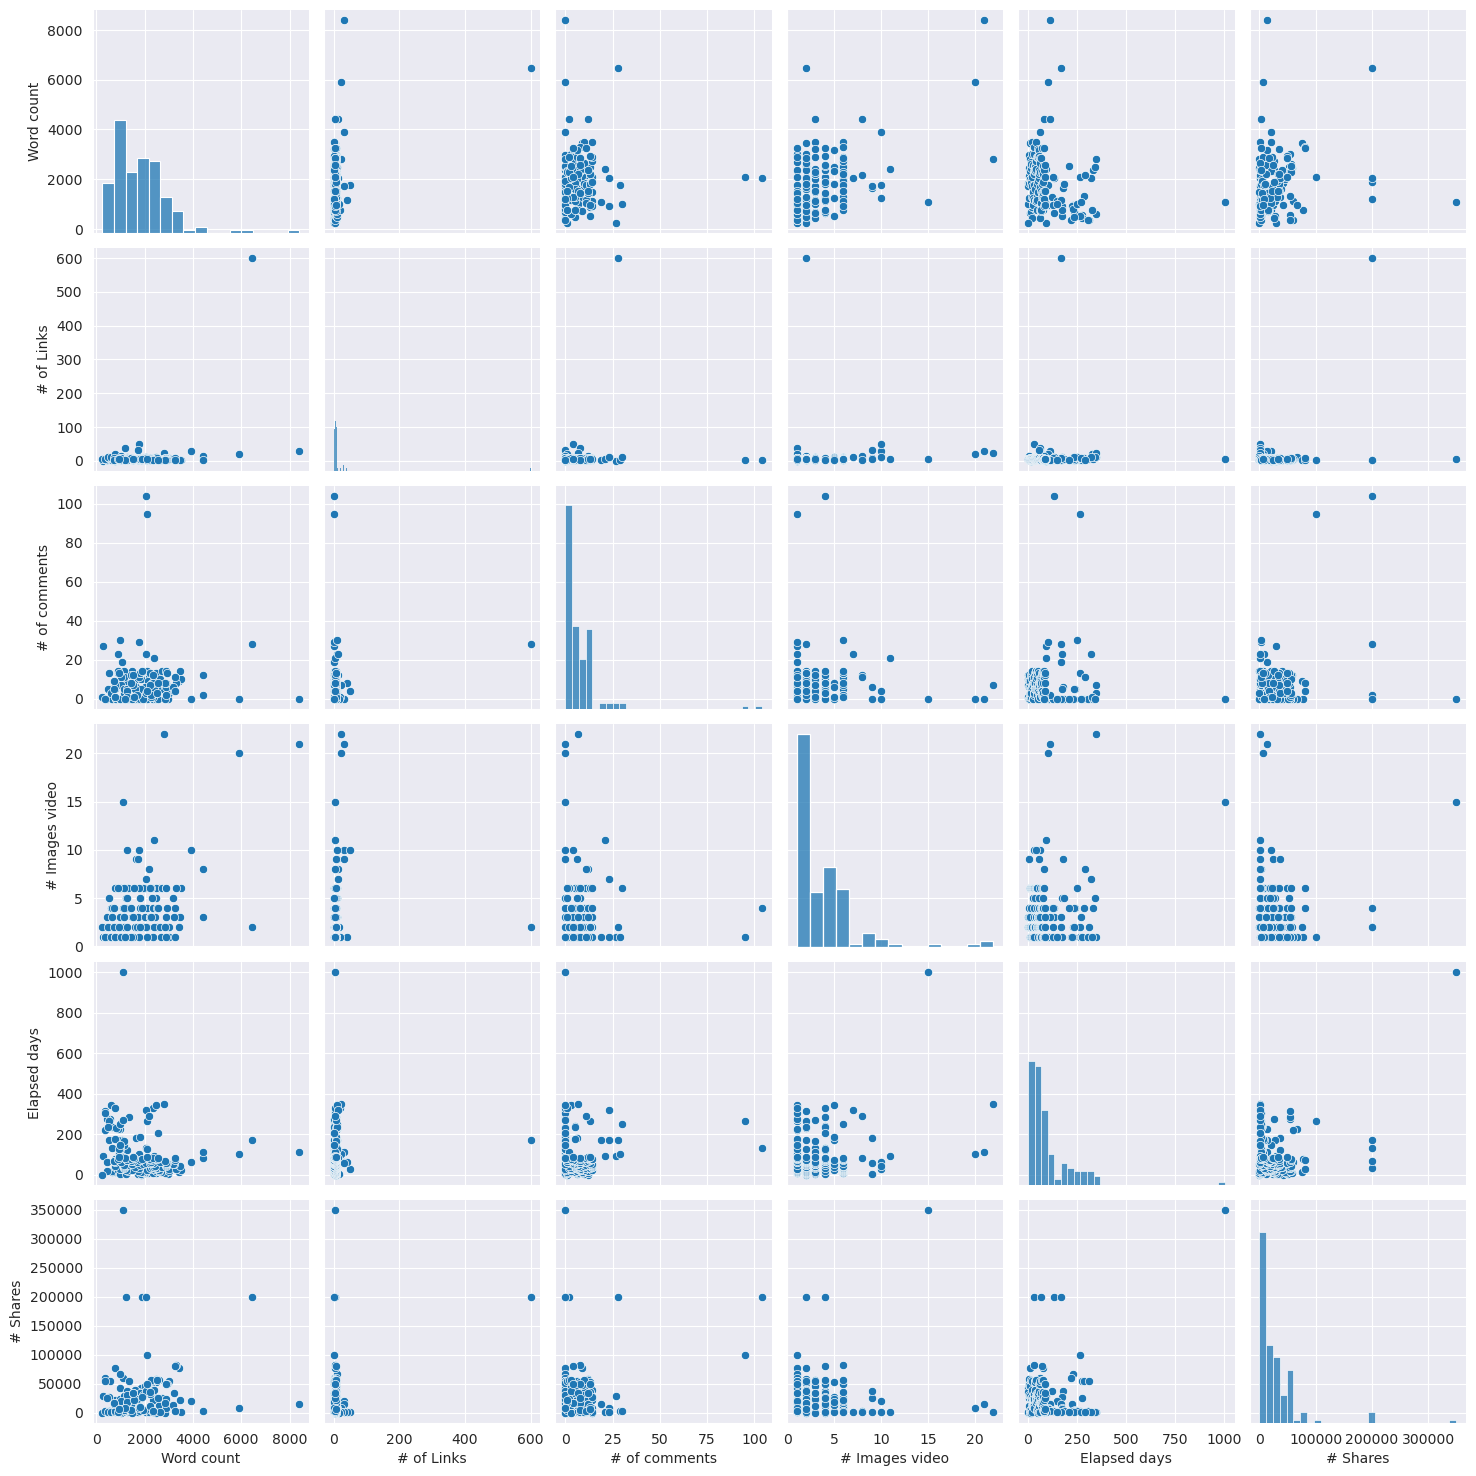

In [76]:
sns.pairplot(articulos)
plt.show()

In [58]:
nan_total = articulos.isna().sum()
print(nan_total)

Title              0
url               39
Word count         0
# of Links         0
# of comments     32
# Images video     0
Elapsed days       0
# Shares           0
dtype: int64


In [59]:
unicos = articulos.nunique()
print(unicos)

Title             161
url               121
Word count        157
# of Links         23
# of comments      24
# Images video     15
Elapsed days      133
# Shares          144
dtype: int64


In [60]:
articulos_sin_nan = articulos.fillna(0)

In [61]:
articulos= articulos_sin_nan.isna().sum()
articulos = articulos_sin_nan
articulos

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,0,1742,9,0.0,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,0,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,0,1221,3,0.0,2,68,200000
4,Nasa finds entire solar system filled with eig...,0,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


In [62]:
articulos.isna().sum()

Title             0
url               0
Word count        0
# of Links        0
# of comments     0
# Images video    0
Elapsed days      0
# Shares          0
dtype: int64

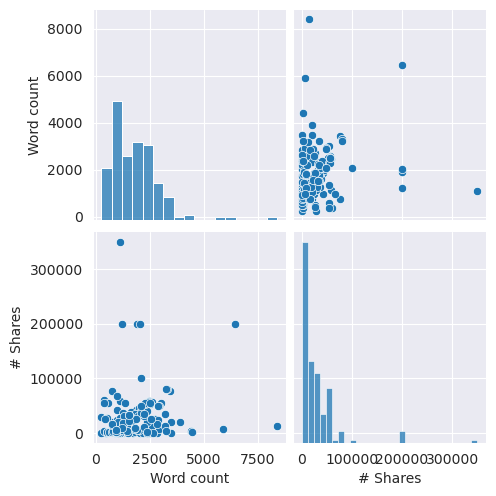

In [77]:
sns.pairplot(articulos[['Word count', '# Shares']])

plt.show()

In [65]:
X = articulos[['Word count']]
y = articulos['# Shares']

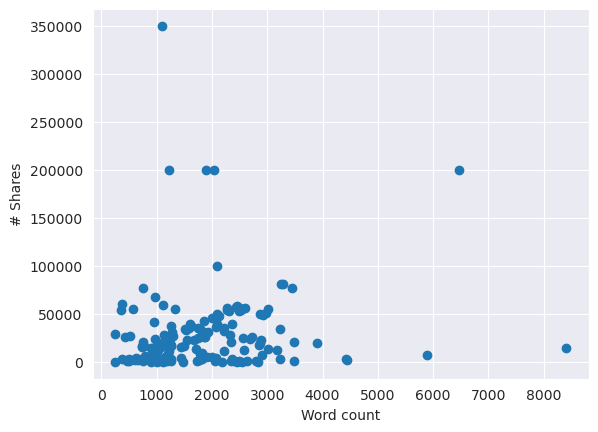

In [69]:
plt.scatter(X, y)
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.show()

In [75]:
regresion_lineal = LinearRegression()
modelo = regresion_lineal.fit(X, y)


LinearRegression()
